# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [2]:
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

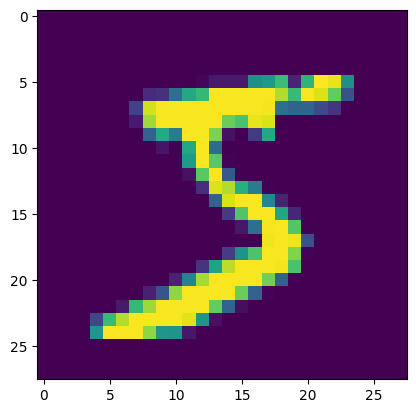

In [3]:
plt.imshow(X_train[0]);

# Normalise The Data

In [4]:
X_train = X_train/255
X_test = X_test/255

# Autoencoder

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

**NOTE** There is no correct way of creating this autoencoder. Here, we are going to use Stacked Autoencoder.

In [6]:
X_train.shape

(60000, 28, 28)

So there are 60k images with dimensions 28 * 28

In [7]:
28 * 28, 784 / 2

(784, 392.0)

Cut the number of nuerons from 784 to nearly half: 400 and continue to do so until you feel like, its arbitrary.

# Encoder

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28])) 

# Hidden Layers
encoder.add(Dense(400, activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100, activation="relu"))
encoder.add(Dense(50, activation="relu"))

# Middlemost Hidden Layer
encoder.add(Dense(25, activation="relu"))

# Decoder

In [9]:
decoder = Sequential()

# Imitate the encoder for HIDDEN LAYERS, not the middlemost HL
decoder.add(Dense(50, activation="relu", input_shape=[25]))
decoder.add(Dense(100, activation="relu"))
decoder.add(Dense(200, activation="relu"))
decoder.add(Dense(400, activation="relu"))

# CREATE INPUT LAYER DIMENSIONS
# Sigmoid because the decoder will basically go through a binary classification
# Saying: Whether this output Image is the same as the input layer or not: Isliye sigmoid
decoder.add(Dense(784, activation="sigmoid"))

# Since Input of encoder is 28,28: Output should also be  
decoder.add(Reshape([28, 28]))

# Autoencoder

In [10]:
autoencoder = Sequential([encoder, decoder])

In [11]:
# IS the image autoencoder producing the same as the input ? 
# Binary Classification
autoencoder.compile(loss="binary_crossentropy", optimizer=SGD(lr=1.5), metrics=["accuracy"])

autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

C:\Users\prath\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2492 - accuracy: 0.0900 - val_loss: 0.2095 - val_accuracy: 0.1347
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1898 - accuracy: 0.1550 - val_loss: 0.1681 - val_accuracy: 0.1774
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1600 - accuracy: 0.1917 - val_loss: 0.1536 - val_accuracy: 0.1935
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1473 - accuracy: 0.2127 - val_loss: 0.1428 - val_accuracy: 0.2133
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1412 - accuracy: 0.2225 - val_loss: 0.1358 - val_accuracy: 0.2288
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1352 - accuracy: 0.2319 - val_loss: 0.1325 - val_accuracy: 0.2301
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1305 - accuracy: 0.2385 - val_loss: 0.1289 - val_ac

In [12]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 245ms/step


Original Image: 


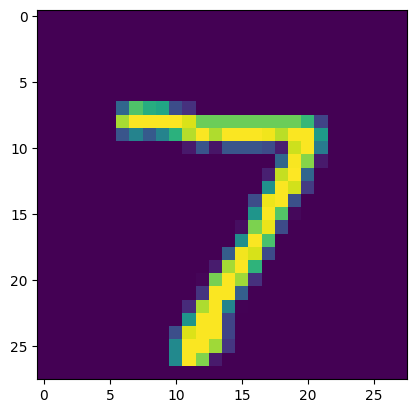

Reconstructed Image: By Autoencoder


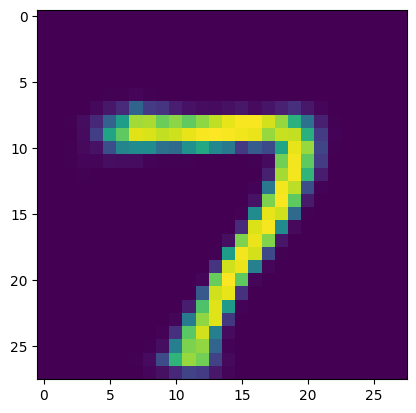

In [17]:
n=0
print("Original Image: ")
plt.imshow(X_test[n])
plt.show()

print("Reconstructed Image: By Autoencoder")
plt.imshow(passed_images[n])


# AutoEncoders for Denoising Images

In [18]:
from tensorflow.keras.layers import GaussianNoise


In [19]:
sample = GaussianNoise(0.2)

In [20]:
noisey = sample(X_test[0:2],training=True)

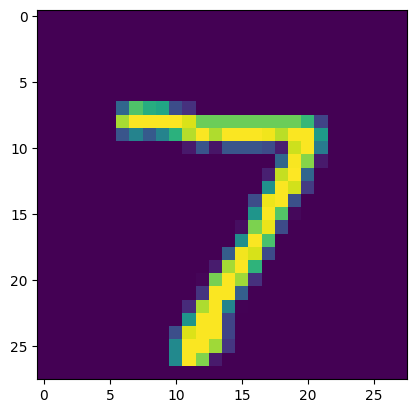

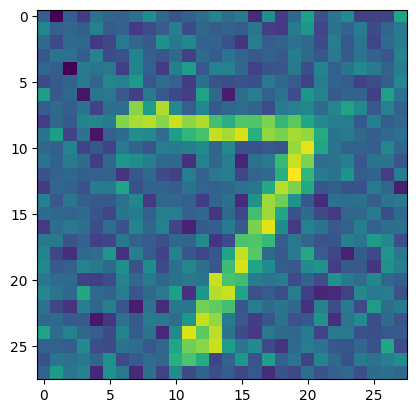

In [23]:
plt.imshow(X_test[0]), 
plt.show(),

plt.imshow(noisey[0])

# Create  noise removal autoencoder and train it.

In [24]:
import tensorflow as tf

# Encoder

In [25]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

# Decoder

In [26]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

# Autoencoder

In [27]:
noise_remover = Sequential([encoder, decoder])

In [28]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [29]:
noise_remover.fit(X_train, X_train, epochs=8,
                        validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 20s 9ms/step - loss: 0.1684 - accuracy: 0.1822 - val_loss: 0.1315 - val_accuracy: 0.2276
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1299 - accuracy: 0.2312 - val_loss: 0.1208 - val_accuracy: 0.2401
Epoch 3/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1216 - accuracy: 0.2442 - val_loss: 0.1146 - val_accuracy: 0.2501
Epoch 4/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1163 - accuracy: 0.2525 - val_loss: 0.1110 - val_accuracy: 0.2637
Epoch 5/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1130 - accuracy: 0.2589 - val_loss: 0.1089 - val_accuracy: 0.2625
Epoch 6/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1102 - accuracy: 0.2645 - val_loss: 0.1069 - val_accuracy: 0.2707
Epoch 7/8
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1079 - accuracy: 0.2693 - val_loss: 0.1037 - val_accuracy:

In [30]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


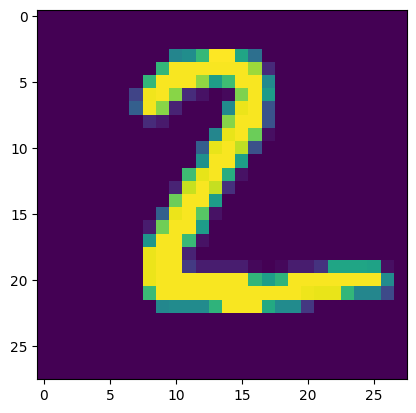

The Noisey Version


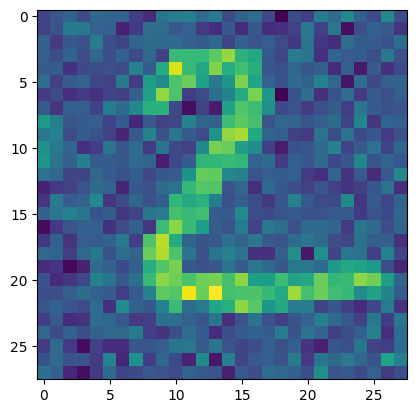

After going through denoiser


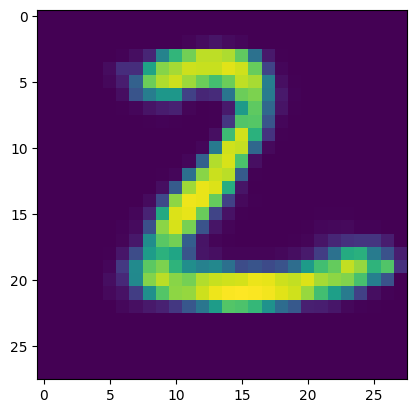

In [31]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()